In [5]:
import pandas as pd

In [6]:
fruits = pd.read_csv('../Data/fruits.csv')
fruits.head()

,length,weight,name
0,25.4,242.0,apple
1,26.3,290.0,apple
2,26.5,340.0,apple
3,29.0,363.0,apple
4,29.0,430.0,apple


In [7]:
fruits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   length  49 non-null     float64
 1   weight  49 non-null     float64
 2   name    49 non-null     object 
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


> fruits는 35개의 사과와 14개의 딸기 데이터로 구성되어 있다.

In [8]:
# 사과 정보만 불러오기
apple = fruits[fruits.name == 'apple']
# apple = fruits[0:35]
apple.tail()

,length,weight,name
30,38.5,920.0,apple
31,38.5,955.0,apple
32,39.5,925.0,apple
33,41.0,975.0,apple
34,41.0,950.0,apple


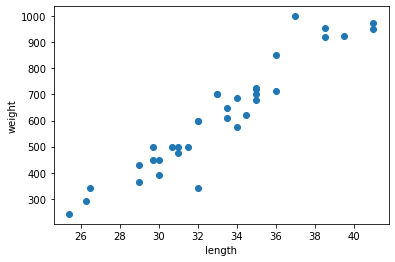

In [9]:
# apple에 대한 산포도 그리기
import matplotlib.pyplot as plt

# plt.figure(figsize=(8, 5))
plt.scatter(apple['length'], apple['weight'])
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [10]:
berry = fruits[35:]
berry.head()

,length,weight,name
35,9.8,6.7,berry
36,10.5,7.5,berry
37,10.6,7.0,berry
38,11.0,9.7,berry
39,11.2,9.8,berry


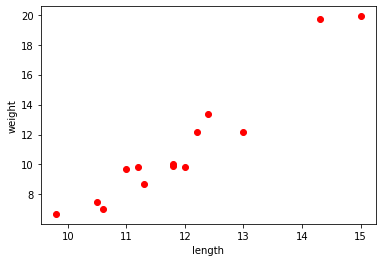

In [11]:
# berry 에 대해서 산포도 그리기
plt.scatter(berry['length'], berry['weight'] , color = 'red')
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

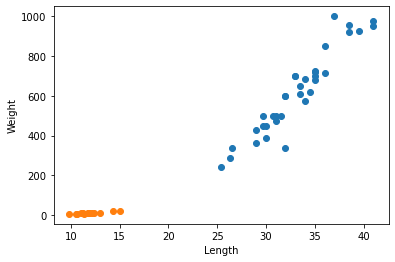

In [12]:
# 2개의 DataSet을 산포도로 한번에 비교하기
plt.scatter(apple.length, apple.weight)
plt.scatter(berry.length, berry.weight)

plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()
# 순서대로 색을 알아서 나눠줌

> 너무나 뚜렷하게 나눠져 있기 때문에 SVM을 쓰기에 딱 좋다. 회귀선 같은건 쓸 필요가 없슴

--- 
# 머신러닝을 위한 데이터 준비
### Feature Data와 Target Data의 분리

In [13]:
# Feature Data

fruitsData = fruits.iloc[:,0:2]
fruitsData.head()

,length,weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [14]:
# Target Data

fruitsTarget = fruits.name
fruitsTarget.head()

0    apple
1    apple
2    apple
3    apple
4    apple
Name: name, dtype: object

---
# 최근접이웃(KNN: K Nearest Neighbors) 분류 알고리즘 사용
: 최근접 이웃 분류 알고리즘은 지도학습이다.

![](../Data/KNN01.jpeg)

<!-- <img src="../Data/KNN01.jpeg" /> -->

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
kn = KNeighborsClassifier() # n_neighbors = 5 (기본값 : 5, 내 주변 5개) / 보통은 홀수로 입력 <-- Hyperparameter 라고 칭한다. (분석가의 판단이 필요한 부분)

In [17]:
# 학습시키기
kn.fit(fruitsData , fruitsTarget)

KNeighborsClassifier()

In [19]:
# 정확성 확인하기
kn.score(fruitsData , fruitsTarget)

1.0

> 문제와 답을 다 알려주고 정확성을 확인했더니 바로 100점이 나왔다. 근데 좀 이상함..

### 예측해 보기
길이가 30cm이고 무게가 600g인 과일은 무엇일까요?

In [22]:
kn.predict([[30, 600]])

array(['apple'], dtype=object)

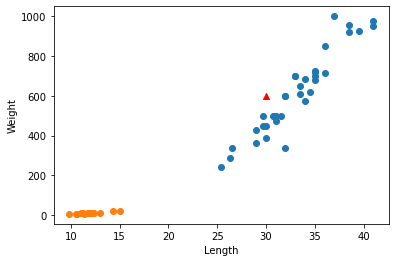

In [31]:
# 산포도로 예측 범위 확인하기

plt.scatter(apple.length, apple.weight)
plt.scatter(berry.length, berry.weight)

plt.scatter(30 , 600 , marker='^' , color = 'red')

plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()
# 순서대로 색을 알아서 나눠줌

---